### **Content License Agreement**

<font color='red'><b>**WARNING**</b></font> : 본 자료는 삼성청년SW·AI아카데미의 컨텐츠 자산으로, 보안서약서에 의거하여 어떠한 사유로도 임의로 복사, 촬영, 녹음, 복제, 보관, 전송하거나 허가 받지 않은 저장매체를 이용한 보관, 제3자에게 누설, 공개 또는 사용하는 등의 무단 사용 및 불법 배포 시 법적 조치를 받을 수 있습니다.

### **Objectives**
1. **과제명**: 로지스틱 회귀 구현

2. **핵심 주제**
  - 로지스틱 회귀에 대한 이해
  - NumPy를 활용한 로지스틱 회귀 분류 모델의 수식화 및 구현  

3. **학습 목표**
  - 로지스틱 회귀의 가설 함수와 Binary Cross-Entropy 손실 함수를 수식으로 표현하고 구현한다.  
  - NumPy로 미니배치 경사 하강법을 이용해 로지스틱 회귀 모델 학습 코드를 작성한다.  

4. **학습 개념**
  - Sigmoid 함수 : 입력 실수 값을 0~1 사이 확률 값으로 변환하는 비선형 활성화 함수  
  - Binary Cross-Entropy : 이진 분류에서 예측값과 실제값 간 차이를 측정하는 손실 함수  
  - 미니배치 경사 하강법 : 작은 배치 단위로 기울기를 계산해 파라미터를 업데이트하는 최적화 기법  

5. **학습 방향**
  1. 데이터 생성 및 시각화  
  2. 로지스틱 회귀 수식화 및 구현  
  3. 하이퍼파라미터 민감도 실험

6. **데이터셋 개요 및 저작권 정보**
  - 데이터셋 명 : Iris Dataset  
  - 데이터셋 개요 : 붓꽃 3종(setosa, versicolor, virginica)으로 구성된 고전적인 다중 클래스 분류용 데이터로, 각 샘플은 꽃받침 길이ㆍ너비와 꽃잎 길이ㆍ너비 4개 특성으로 이루어져 있습니다. 총 150개 샘플로 이루어져 있으며, 데이터 전처리 없이 바로 학습 실습에 활용할 수 있습니다.  
  - 데이터셋 저작권 : UCI Machine Learning Repository에 공개된 퍼블릭 도메인 데이터로, 원저작권자는 Ronald A. Fisher입니다.  


### **Prerequisites**
```
numpy>=1.26
seaborn>=0.12
matplotlib>=3.8
```


# Logistic Regression 구현하기
- 학습 목표
	- 이진 분류에서 로지스틱 회귀의 가설 함수, 손실 함수, 그래디언트를 수식으로 이해한다.
	- 수치적으로 안정적인 로지스틱 손실을 벡터화하여 구현한다.

- 학습 개념
    - 가설 함수: 시그모이드 확률 예측
        - 로지스틱 회귀의 확률 예측은 다음과 같습니다:
        $$
        p(y=1 \mid \mathbf{x}) = \sigma(z), \quad z = \mathbf{x}^\top \mathbf{w} + b, \quad \sigma(z) = \frac{1}{1 + e^{-z}}
        $$
    - 손실 함수: 이진 크로스엔트로피
        $$
        L(\mathbf{w}, b) = -\frac{1}{m} \sum_{i=1}^m \left[ y_i \log(\hat{p}_i) + (1 - y_i)\log(1 - \hat{p}_i) \right]
        $$
        - $m$: 샘플 개수
        - $\hat{p}_i$: 시그모이드 확률 출력

    - 그래디언트 (벡터화)
    $$
    \nabla_\mathbf{w} = \frac{1}{m} \mathbf{X}^\top (\hat{\mathbf{p}} - \mathbf{y}), \nabla_b = \frac{1}{m} \sum_{i=1}^m (\hat{p}_i - y_i)
    $$

    - 수치 안정성
        - $\log(\hat{p})$, $\log(1 - \hat{p})$ 계산 시, $\hat{p}$를 $[\epsilon, 1 - \epsilon]$ 범위로 클리핑하여 로그 입력이 0이 되는 것을 방지합니다.

- 진행하는 실습 요약
	- 합성 이진 분류 데이터 생성 및 표준화 (평균 0, 표준편차 1로 스케일링)
	- 시그모이드 함수, 손실/그래디언트, 예측 함수를 NumPy로 구현
	- 배치 Gradient Descent로 학습하며 손실 및 정확도 기록

### 1. 로지스틱 회귀란?
앞선 실습에서는 선형 회귀를 통해 회귀 과제를 수행하였습니다. 이는 회귀 과제 중에 가장 기본적인 형태입니다. 그렇다면 분류과제에서는 어떤 알고리즘이 가장 기초적일까요? 바로 로지스틱 회귀입니다. 이름에 회귀가 있지만 실제로 이 모델은 분류를 수행하는 모델입니다 😅

로지스틱 회귀는 입력 벡터 $\mathbf{x}$를 선형 결합한 점수 $z = \mathbf{x}^\top \mathbf{w} + b$를 시그모이드 함수 $\sigma(z) = \frac{1}{1 + e^{-z}}$를 통해 확률로 매핑하여 이진 분류를 수행하는 확률적 선형 모델입니다. 잘 생각해보면 앞에서 배운 선형 회귀 모델의 출력을 시그모이드 함수에 넣어서 확률화하는 것이 됩니다. 시그모이드 함수는 입력값을 0부터 1사이로 매핑해주는 함수로 입력값이 0일 때 0.5를 출력해주는 함수입니다. 아래 코드를 참고해주세요

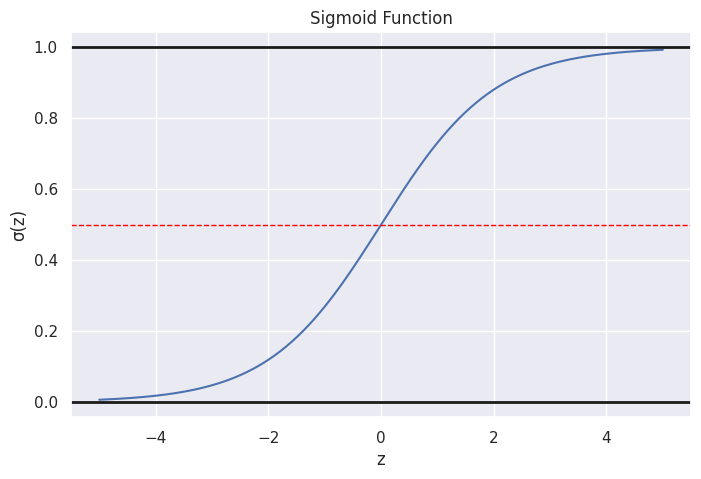

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-5, 5, 200)
p = sigmoid(z)

plt.figure(figsize=(8, 5))
sns.lineplot(x=z, y=p)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.axhline(0.5, color='red', linestyle='--', linewidth=1)
plt.axhline(0.0, color='k', linestyle='-', linewidth=2)
plt.axhline(1.0, color='k', linestyle='-', linewidth=2)
plt.show()

### 2. 모델 학습하기
#### 2.1 손실함수: 이진크로스엔트로피 (Binary Cross-Entropy)
그러면 결국 학습해야 하는 매개변수는 선형 회귀 때와 정확히 같습니다. 학습을 위해 필요한 것을 다시 떠올려보면, 우리가 현재 가지고 있는 매개변수가 얼마나 해당 과제를 잘 수행하고 있는지 보고(손실함수), 해당 손실함수의 미분값에 맞춰 매개변수를 업데이트해주는 것입니다.

그러나 로지스틱 회귀 모델은 분류 모델입니다. 회귀 모델에서 사용한 평균제곱오차(MSE)를 사용할 수는 있지만, 효과적이지 않습니다. 분류 모델에서 가장 널리 쓰이는 손실함수는 바로 Cross-Entropy라는 손실함수입니다. 다음 수식을 참고해주세요.

$$
L(\mathbf{w}, b) = -\frac{1}{m} \sum_{i=1}^m \left[ y_i \log(\hat{p}_i) + (1 - y_i)\log(1 - \hat{p}_i) \right]
$$

- 데이터 $x_i$에 대한 모델의 출력값 $\hat{p}_i$가 있다고 합시다. 그리고 해당 데이터 $x_i$의 라벨은 0 혹은 1 값을 가지는 $y_i$입니다. 두 경우로 나누어서 $\Sigma$ 안에 있는 값을 확인해봅시다.
  - **만약 $y_i$가 0일 때**: 앞에 항이 0이고 뒤의 항 $-\log(1-\hat{p}_i)$만 남습니다. $-\log$ 함수는 0과 1사이에서 1에 가까울수록 0이 되는 함수입니다. 예측값 $\hat{p}_i$가 잘 예측된다면 (0에 가까우면) 손실함수가 0에 가까워집니다.
  - **만약 $y_i$가 1일 때**: 뒤에 항이 0이고 앞의 항 $-\log(\hat{p}_i)$만 남습니다. 예측값 $\hat{p}_i$가 1에 가까우면 손실함수 항이 0에 가까워집니다.

수식이 복잡하게 생겨 이해가 어려울 수 있지만, 경우를 나눠서 따져보면 그렇게 어렵지 않습니다. 이제 손실함수를 알았으니 매개변수 업데이트를 위해 미분을 구해봅시다.

#### 2.2 BCE의 미분
로지스틱 회귀 학습을 위한 이진크로스엔트로피의 그래디언트는 다음과 같이 계산됩니다.
$$
\nabla_\mathbf{\theta} = \frac{1}{m} \mathbf{X}^\top (\hat{\mathbf{p}} - \mathbf{y}),
\nabla_\mathbf{b} = \frac{1}{m} \mathbf{1}^\top (\hat{\mathbf{p}} - \mathbf{y})
$$

### 3. 모델 평가하기
선형 회귀에서 사용한 손실함수 평균제곱오차(MSE)는 그 자체로 손실함수이며 모델의 성능을 평가하기에도 문제가 없는 함수입니다. 하지만 이진크로스엔트로피는 그 값을 보고 직관적으로 모델의 성능이 어느 정도 되는지 사람이 한 눈에 평가하기는 어렵습니다.

보통 분류문제를 평가하는데 널리 쓰이는 값은 정확도(Accuracy)입니다. 단순히 모델의 예측값과 실제값이 일치하는 경우의 비율을 구하는 것입니다. 정확도는 여러 가지로 취약성이 높은 평가지표이기 때문에 추후에 분류 모델을 평가하는 여러 가지 지표에 대해 배운 뒤에 사용해보도록 합시다.

### 🧑‍💻 **실습**: 로지스틱 회귀 수행하기

#### 1. 데이터셋 불러오기 & 전처리하기

이번에는 seaborn의 iris dataset을 불러서 전처리해봅시다. 앞선 실습에서 진행한대로 수행해주시면 됩니다. 해당 데이터셋은 `sepal_length`, `sepal_width`, `petal_length`, `petal_width`라는 특성을 통해 꽃의 품종 (`species`)를 예측할 수 있는 데이터셋입니다. 우리가 배운 로지스틱 회귀는 이진분류 모델이기 때문에 `iris` 데이터셋에 포함된 3가지 종류를 분류할 수 없습니다. 따라서 `species`의 `virginica`를 1, 나머지 두 종류를 0으로 두고 학습을 진행해봅시다.

In [9]:
# @title
import seaborn as sns
import numpy as np
import pandas as pd

# TODO: 데이터셋 불러오기
df = sns.load_dataset("iris")

# 'versicolor'와 'virginica' 데이터만 필터링합니다.
df_filtered = df[df['species'].isin(['versicolor', 'virginica'])]

# Feature만 포함된 X와 라벨값인 y를 저장해주세요
# y는 0과 1로 구성되어야하며, virginica가 1이 되도록 구성해주세요.
X = df_filtered.drop('species', axis=1).values
y = (df_filtered['species'] == 'virginica').astype(int).values.reshape(-1, 1)

# TODO: 데이터 섞어주기
# iris 데이터는 species에 따라 오름차순 정렬되어 있습니다. 순서를 섞어주고 학습하는 것이 좋습니다.
# 순서를 섞은 후에 전체 데이터의 80%를 학습데이터, 나머지 20% 데이터를 검증데이터로 사용해봅시다.
# 각 데이터는 X_train, y_train / X_valid, y_valid에 할당해줍시다.

# 데이터의 인덱스를 무작위로 섞습니다.
shuffled_indices = np.random.permutation(len(X))
# 섞인 인덱스를 사용해 X와 y의 순서를 동일하게 섞어줍니다.
X_shuffled = X[shuffled_indices]
y_shuffled = y[shuffled_indices]

# 데이터를 80% 지점에서 분리할 인덱스를 계산합니다.
split_idx = int(0.8 * len(X))

# 80%는 학습용, 20%는 검증용으로 데이터를 분리합니다.
X_train, X_valid = X_shuffled[:split_idx], X_shuffled[split_idx:]
y_train, y_valid = y_shuffled[:split_idx], y_shuffled[split_idx:]


# TODO: 데이터 전처리하기
# 앞선 실습에서 배운 표준화를 진행해주세요. 같은 변수에 할당해주세요.
# 그런데 검증데이터 X_valid는 학습데이터의 평균과 표준편차 값에 맞춰서 표준화를 진행해야합니다.
# 이는 데이터 누수를 방지하기 위함입니다. 우리는 실제로 새롭게 들어오는 검증데이터의 통계를 알 수 없기 때문입니다.
# 이번에 절편항은 학습되는 매개변수로 만들어 데이터에 추가하지 않고 사용해봅시다.

# 중요: 평균과 표준편차는 '학습 데이터(X_train)'만으로 계산합니다.
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0) + 1e-8 # 0으로 나누는 것을 방지

# 학습 데이터와 검증 데이터 모두 '학습 데이터의 통계량'으로 표준화합니다.
X_train = (X_train - mu) / sigma
X_valid = (X_valid - mu) / sigma

# --- 결과 확인 (옵션) ---
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")

X_train shape: (80, 4)
y_train shape: (80, 1)
X_valid shape: (20, 4)
y_valid shape: (20, 1)


#### 2. 모델 학습하기
좋습니다. 이제 데이터가 학습에 들어가기에 적합하게 전처리되었습니다. 학습 부분은 앞에서 배운 실습과 동일하게 진행해주시면 됩니다. 과정을 다시 복습해봅시다.

1. 현재 매개변수를 통해 예측값 만들기
  - 선형 회귀에서는 매개변수와 입력값의 행렬곱만 진행해주면 되었는데요, 선형 회귀는 행렬곱 값을 시그모이드 함수에 입력으로 넣어주어야 합니다.
2. 예측값과 실제값 사이 손실함수 계산하기
  - MSE가 아닌 이진크로스엔트로피를 계산해줘야 합니다.
3. 2에서 계산한 손실값에 대한 미분 계산하기
  - 미분은 위의 수식으로부터 $\frac{1}{m} \mathbf{X}^\top (\hat{\mathbf{p}} - \mathbf{y})$ 입니다. 여기에 맞춰서 계산해주세요. 상수항의 미분은 $\frac{1}{m} \mathbf{1}^\top (\hat{\mathbf{p}} - \mathbf{y})$ 입니다.
4. 3의 미분을 기반으로 매개변수 업데이트하기

Train Acc: 0.5006
Valid Acc: 0.5200


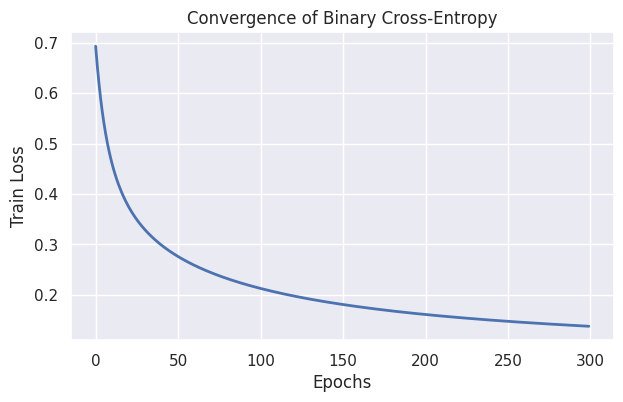

In [10]:
# 위에서 짠 코드는 잘 작동할까요? 한 번 검증해봅시다!
W, b, losses = train_logistic_regression(X_train, y_train, lr=0.1, epochs=300)

def accuracy(W, b, X, y):
    prediction = predict_proba(W, b, X) > 0.5
    return (prediction == y).mean()

print(f"Train Acc: {accuracy(W, b, X_train, y_train):.4f}")
print(f"Valid Acc: {accuracy(W, b, X_valid,  y_valid):.4f}")

plt.figure(figsize=(7,4))
plt.plot(losses, linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Train Loss")
plt.title("Convergence of Binary Cross-Entropy")
plt.show()

#### 3. 요소를 추가하기
우리는 성공적으로 로지스틱 회귀 구현 및 학습을 해냈습니다. 여기에 앞서 배운 내용들과 새로운 내용 한 가지를 추가해봅시다.

1. **Mini-Batch Training**: 앞선 실습에서 전체 데이터에 대한 미분 계산이 아니라, mini-batch에 대해서 계산을 진행했었습니다. 다시 한 번 구현해봅시다.
2. **Gradient Accumulation**: 메모리나 하드웨어 제약으로 한 번에 큰 배치를 사용할 수 없을 때 사용하는 기법이었습니다. 현재 우리가 사용하는 데이터는 적기 때문에 두 기법 모두 굳이 사용할 필요는 없지만, 연습차원에서 진행해봅시다.
3. **Early Stopping**: MSE의 경우 0에 가까워지면 조기 종료를 수행했습니다. BCE도 0에 가까울수록 수렴하지만, 보통 0까지 가기는 어렵습니다. 이번에는 절대적인 값이 아니라 상대적인 값을 기준으로 조기종료 조건을 만들어봅시다.
4. **L2-Regularization**: 학습하다보면 가중치의 값이 너무 커져 발산하는 경우가 있습니다. 이는 학습률을 통해 조정할 수도 있지만, 손실함수에 조치를 취하는 방법으로 해결할 수도 있습니다.
  - 대표적인 방법이 L2-정규화입니다. 쉽게 설명하면 매개변수의 L2-norm 크기에 제한을 두어 이를 손실함수에 추가하여 조절하는 것입니다.
  - 로지스틱 회귀 학습에서는 BCE 함수에 아래 수식에 있는 L2-norm을 추가하여 계산할 수 있습니다.
  $$
  \frac{\lambda}{2} |\mathbf{w}|^2 = \frac{\lambda}{2} \sum_j w_j^2
  $$
  - $\lambda$는 가중치의 제곱합 크기를 조절하는 초매개변수입니다.
  - 이를 추가한 손실함수와 미분은 다음과 같습니다.
  $$L(\mathbf{w}, b) = -\frac{1}{m} \sum_{i=1}^m \left[ y_i \log(\hat{p}_i) + (1 - y_i)\log(1 - \hat{p}_i) \right] + \frac{\lambda}{2} \|\mathbf{w}\|_2^2$$
  $$\nabla_{\mathbf{w}} = \frac{1}{m} \mathbf{X}^\top (\hat{\mathbf{p}} - \mathbf{y}) + \lambda \mathbf{w}$$
  $$\nabla_b = \frac{1}{m} \sum_{i=1}^m (\hat{p}_i - y_i)$$
  - 손실함수와 W에 대한 미분항에 살짝 변화가 있습니다. 확인하여 코드에 반영해주세요.

구현이 잘되었는지 확인해볼까요? 아래 코드로 수행해보세요.

In [22]:
import numpy as np
from typing import Tuple, List, Optional

# --- 이전 단계에서 정의된 함수 (가정) ---
def sigmoid(z: np.ndarray) -> np.ndarray:
    z = np.clip(z, -500, 500)
    return 1.0 / (1.0 + np.exp(-z))

def predict_proba(W: np.ndarray, b: float, X: np.ndarray) -> np.ndarray:
    z = X @ W + b
    return sigmoid(z)
# ------------------------------------

def train_logistic_regression_improve(
    X: np.ndarray,
    y: np.ndarray,
    lr: float = 0.1,
    epochs: int = 300,
    eps: float = 1e-12,
    # 새롭게 추가된 arguments
    batch_size: Optional[int] = None,   # None 이면 full batch
    l2: float = 0.0,                    # L2 강도 (0.0 이면 off)
    accumulate_n: int = 1,              # 그라디언트 누적 스텝
    patience: int = 0                   # early stopping 윈도우, 0 이면 off
) -> Tuple[np.ndarray, float, List[float]]:
    m, n = X.shape
    W = np.zeros(n)
    b = 0.0
    losses: List[float] = []
    y_flat = y.flatten()

    best_loss = np.inf
    no_improve = 0

    # full-batch 모드 설정
    if batch_size is None or batch_size > m:
        batch_size = m

    for ep in range(epochs):
        # 데이터 셔플
        idx = np.random.permutation(m)
        Xs, ys = X[idx], y_flat[idx]

        # 누적 버퍼 초기화
        gW_acc = np.zeros_like(W)
        gb_acc = 0.0
        cnt = 0

        # mini-batch loop
        for start in range(0, m, batch_size):
            xb = Xs[start:start+batch_size]
            yb = ys[start:start+batch_size]
            mb = len(xb) # 실제 배치 크기

            # TODO: 예측값 계산 및 손실함수 계산하기
            p = predict_proba(W, b, xb)
            loss_b = -np.mean(yb * np.log(p + eps) + (1 - yb) * np.log(1 - p + eps))

            # TODO: 미분 계산하기 (L2 정규화 포함)
            diff = p - yb
            gW = (1 / mb) * (xb.T @ diff) + l2 * W
            gb = np.mean(diff)

            # TODO: Gradient Accumulation 구현하기
            gW_acc += gW
            gb_acc += gb
            cnt += 1
            if cnt == accumulate_n:
                # 누적된 그래디언트로 파라미터 업데이트
                W -= lr * (gW_acc / cnt)
                b -= lr * (gb_acc / cnt)
                # 누적 버퍼 리셋
                gW_acc.fill(0)
                gb_acc = 0.0
                cnt = 0

        # epoch 종료 후 남은 누적 그래디언트 업데이트
        if cnt > 0:
            W -= lr * (gW_acc / cnt)
            b -= lr * (gb_acc / cnt)

        # TODO: 전체 데이터에 대한 loss 계산 (로깅용)
        p_all = predict_proba(W, b, X)
        epoch_loss = -np.mean(y_flat * np.log(p_all + eps) + (1 - y_flat) * np.log(1 - p_all + eps))
        if l2 > 0:
            # 로깅할 때는 L2 페널티 항을 더해줌
            epoch_loss += (l2 / 2) * np.sum(W**2)
        losses.append(epoch_loss)

        if patience > 0:
            # TODO: Early Stopping 구현
            if epoch_loss < best_loss:
                best_loss = epoch_loss
                no_improve = 0
            else:
                no_improve += 1

            if no_improve >= patience:
                print(f"Early stopping at epoch {ep+1}")
                break

    return W, b, losses

Train Acc: 0.5075
Valid Acc: 0.5000


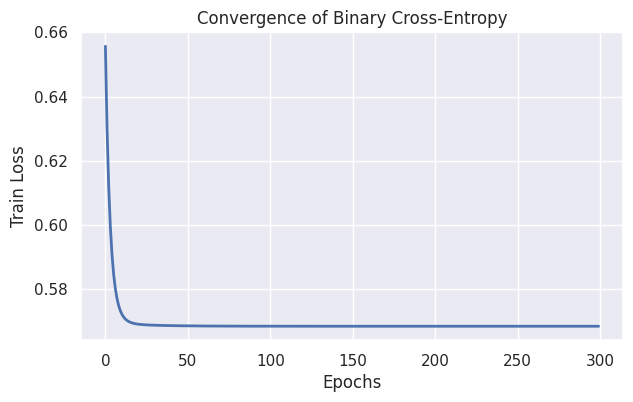

In [23]:
# 위에서 짠 코드는 잘 작동할까요? 한 번 검증해봅시다!
W, b, losses = train_logistic_regression_improve(X_train, y_train,
                                                 lr=0.1,
                                                 epochs=300,
                                                 l2=1, accumulate_n=5)

def accuracy(W, b, X, y):
    prediction = predict_proba(W, b, X) > 0.5
    return (prediction == y).mean()

print(f"Train Acc: {accuracy(W, b, X_train, y_train):.4f}")
print(f"Valid Acc: {accuracy(W, b, X_valid,  y_valid):.4f}")

plt.figure(figsize=(7,4))
plt.plot(losses, linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Train Loss")
plt.title("Convergence of Binary Cross-Entropy")
plt.show()

초매개변수를 바꿔가면서 loss가 어떻게 변하는지 확인해봅시다!

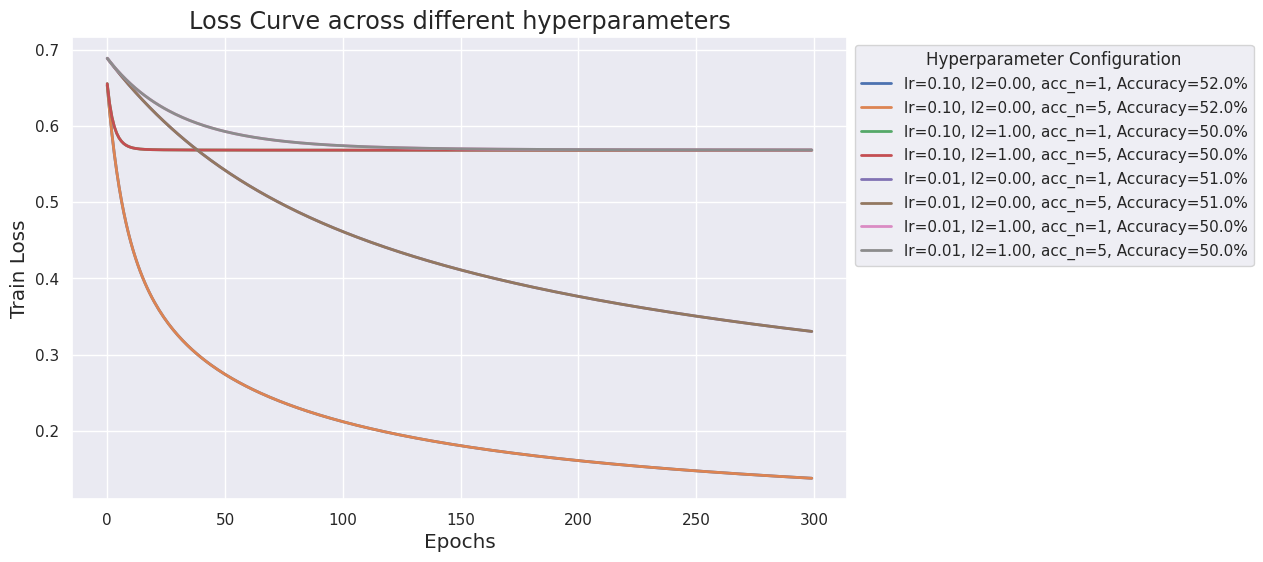

In [24]:
from itertools import product

# 실험 조합 설정 (학습률, L2, 누적 스텝)
lrs = [0.1, 0.01]
l2s = [0.0, 1.0]
accs = [1, 5]
experiments = list(product(lrs, l2s, accs))

plt.figure(figsize=(10, 6))

for lr, l2, acc_n in experiments:
    W, b, losses = train_logistic_regression_improve(
        X_train, y_train,
        lr=lr,
        l2=l2,
        accumulate_n=acc_n,
        epochs=300,
        patience=0
    )
    # Validation data에 대한 정확도 계산
    acc = accuracy(W, b, X_valid, y_valid)
    label = f"lr={lr:.2f}, l2={l2:.2f}, acc_n={acc_n}, Accuracy={acc*100:3.1f}%"
    plt.plot(losses, label=label, linewidth=2)

plt.xlabel("Epochs", size="large")
plt.ylabel("Train Loss", size="large")
plt.title("Loss Curve across different hyperparameters", size="x-large")
plt.legend(title="Hyperparameter Configuration", bbox_to_anchor=(1, 1))
plt.show()

# 마치며 ...

오늘은 성공적으로 Logistc Regression을 통한 분류과제를 진행해보았습니다. 사실 오늘 배운 과정들은 High-level framework로 몇 줄로도 구현이 가능합니다. 하지만 코드 한 줄에서 돌아가는 내용을 알고 쓰는 것과 모르고 쓰는 것은 응용력에서 큰 차이가 생깁니다. 오늘도 수고 많으셨습니다 :)

### Further Readings
- Logistic Regression From Scratch in Python NumPy: 벡터 연산만으로 로지스틱 회귀를 구현하는 과정을 단계별로 설명합니다. 구현 세부 사항을 하나하나 짚어 보며, 그라디언트 계산과 파라미터 업데이트가 어떻게 이뤄지는지 깊이 이해할 수 있습니다.
  - https://towardsdatascience.com/logistic-regression-from-scratch-in-python-ec66603592e2/

- Gradient Descent Cheatsheet & Learning Rate Schedules: 다양한 학습률 스케줄(고정, 단계적 감소, 지수 감소 등)과 그 효과를 정리한 가이드입니다. Mini-batch Gradient Descent 외에 다른 최적화 방법에 대해 간단하게 알아봅시다.
  - https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html
  

### Open-ended Mission

- **Multi-Class Softmax Regression 구현**: 소프트맥스 함수와 교차엔트로피 손실을 도입해 Iris의 세 가지 종(셋) 모두 분류하기
- **2D 의사결정 경계(Decision Boundary) 시각화**: 두 개 특성(예: petal_length vs petal_width)만 선택해, 그리드 포인트별 예측 확률을 계산. 등고선(contour)으로 분류 경계를 그려 보고, 모델이 어떻게 클래스를 분리하는지 직관적으로 확인